In [31]:
#importing all the required libraries

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from ucimlrepo import fetch_ucirepo, list_available_datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import silhouette_score


In [3]:
# check the available datasets to import
list_available_datasets()

-------------------------------------
The following datasets are available:
-------------------------------------
Dataset Name                                                                            ID    
------------                                                                            --    
Abalone                                                                                 1     
Adult                                                                                   2     
Auto MPG                                                                                9     
Automobile                                                                              10    
Breast Cancer                                                                           14    
Breast Cancer Wisconsin (Original)                                                      15    
Breast Cancer Wisconsin (Diagnostic)                                                    17    
Car Evaluation                 

In [4]:
# import the required dataset from the collection
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)

#Collecting the features and targets from the dataset
df = breast_cancer_wisconsin_original.data.features
df = df.copy()
df['class'] = breast_cancer_wisconsin_original.data.targets

In [5]:
df.head(10)

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2
5,8,10,10,8,7,10.0,9,7,1,4
6,1,1,1,1,2,10.0,3,1,1,2
7,2,1,2,1,2,1.0,3,1,1,2
8,2,1,1,1,2,1.0,1,1,5,2
9,4,2,1,1,2,1.0,2,1,1,2


In [6]:
#finding the missing values
print('Number of missing values:')
for col in df.columns:
    print('\t%s: %d' % (col,df[col].isna().sum()))

Number of missing values:
	Clump_thickness: 0
	Uniformity_of_cell_size: 0
	Uniformity_of_cell_shape: 0
	Marginal_adhesion: 0
	Single_epithelial_cell_size: 0
	Bare_nuclei: 16
	Bland_chromatin: 0
	Normal_nucleoli: 0
	Mitoses: 0
	class: 0


In [7]:
#printing the instances and attributes of dataset
print('Number of instances = %d' % (df.shape[0]))
print('Number of attributes = %d' % (df.shape[1]))

Number of instances = 699
Number of attributes = 10


In [8]:
# Drop missing values and unnecessary columns
df.replace('?', pd.NA, inplace=True)
print('Number of rows in original data = %d' % (df.shape[0]))

df1 = df.dropna()
print('Number of rows after discarding missing values = %d' % (df1.shape[0]))

Number of rows in original data = 699
Number of rows after discarding missing values = 683


In [9]:
# Fill missing values in the 'Bare_nuclei' column with the median value
df1.loc[:, 'Bare_nuclei'] = df1['Bare_nuclei'].fillna(df1['Bare_nuclei'].median())

In [10]:
# Drop rows with missing values
df1 = df1.dropna(inplace=False)
# Separate features and labels
Cancer = df1.drop('class', axis=1)

C:\Users\adith\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


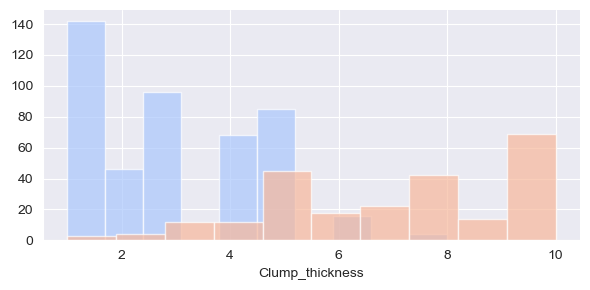

In [11]:
#Generate histogram to show distribution of Clump_thickness for different classes 

sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="class",palette='coolwarm',aspect=2)
g = g.map(plt.hist,'Clump_thickness',bins=10,alpha=0.7)

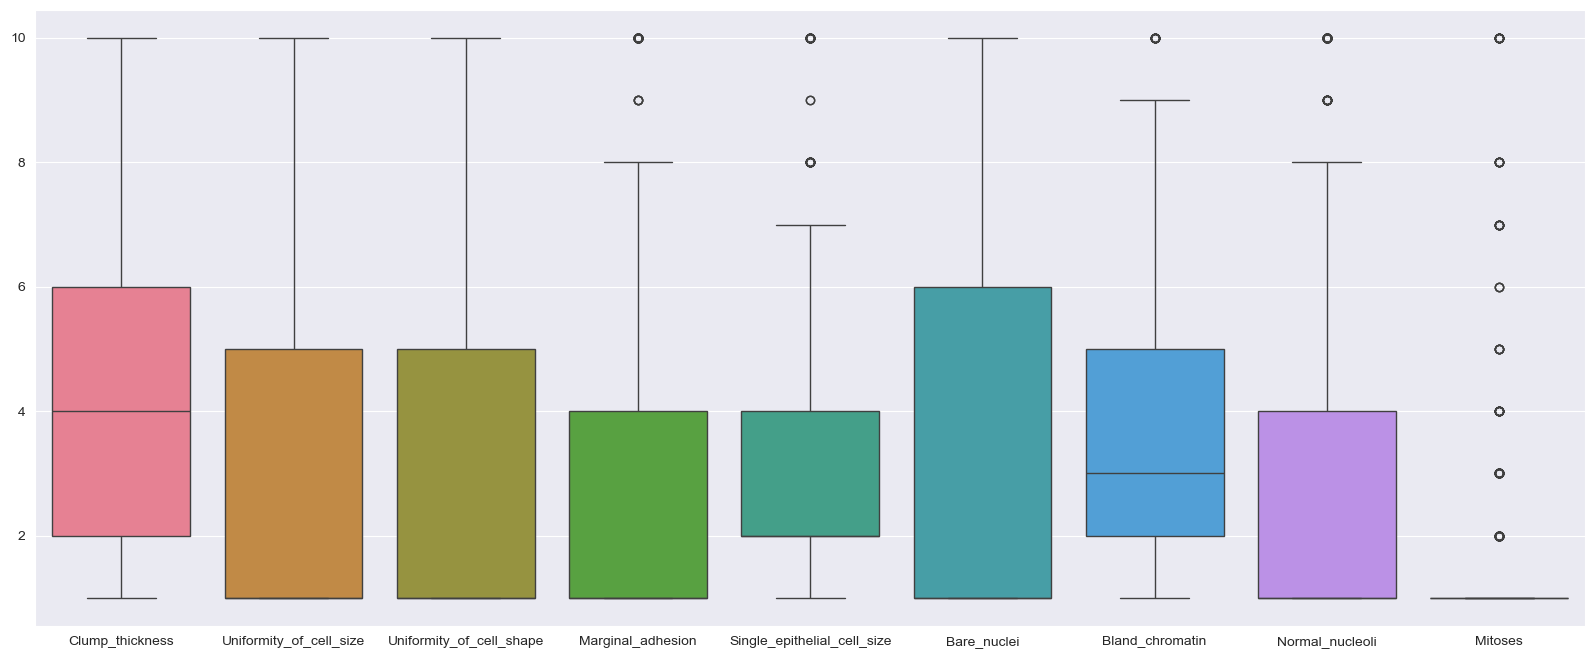

In [12]:
#identifying outliers using the boxplot
plt.figure(figsize=(20,8))
sns.set_palette("husl")
sns.boxplot(Cancer)
plt.show()

In [13]:
# dealing with the outliers
data = (Cancer-Cancer.mean())/Cancer.std()
data[20:25]

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
20,0.906788,-0.049200,-0.406623,2.502944,0.794274,1.771569,0.634734,0.370269,1.383283
21,1.970331,0.603298,0.597198,0.059290,1.244099,0.948266,1.451161,2.335764,-0.348145
22,-0.511269,-0.701698,-0.741230,-0.638897,-0.555202,-0.698341,-0.589908,-0.612478,-0.348145
24,-1.220297,-0.701698,-0.741230,-0.638897,-0.555202,-0.698341,-0.181694,-0.612478,-0.348145
25,0.197760,-0.375449,-0.072016,0.408383,-0.555202,0.948266,-0.181694,1.025434,-0.348145


In [14]:
# Discarding the outliers
print('Number of rows before discarding outliers = %d' % (data.shape[0]))
Cancer2 = data.loc[((data > -3).sum(axis=1)==9) & ((data <= 3).sum(axis=1)==9),:]
print('Number of rows after discarding outliers = %d' % (Cancer2.shape[0]))

Number of rows before discarding outliers = 683
Number of rows after discarding outliers = 632


In [15]:
#Finding duplicate values
datadup = df.duplicated()
print('Number of duplicate rows = %d' % (datadup.sum()))

# Discarding the duplicates values
print('Number of rows before discarding duplicates = %d' % (df.shape[0]))
df2 = df.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (df2.shape[0]))

Number of duplicate rows = 236
Number of rows before discarding duplicates = 699
Number of rows after discarding duplicates = 463


In [16]:
# Standardize the features
scaler = StandardScaler()
Anom_scaled = scaler.fit_transform(Cancer)

In [17]:
# Calculate distances to the k-th nearest neighbor (k=3 in this example)
k = 3
neigh = NearestNeighbors(n_neighbors=k)
neigh.fit(Anom_scaled)
distances, _ = neigh.kneighbors(Anom_scaled)

# Anomaly scores - using the distance to the k-th nearest neighbor
anomaly_scores = distances[:, -1]

In [18]:
# sets anomaly score threshold to the 95 percentile 
threshold = np.percentile(anomaly_scores, 95)

In [19]:
# Visualize the results using PCA for dimensionality reduction
pca = PCA(n_components=3)
Anom_pca = pca.fit_transform(Anom_scaled)

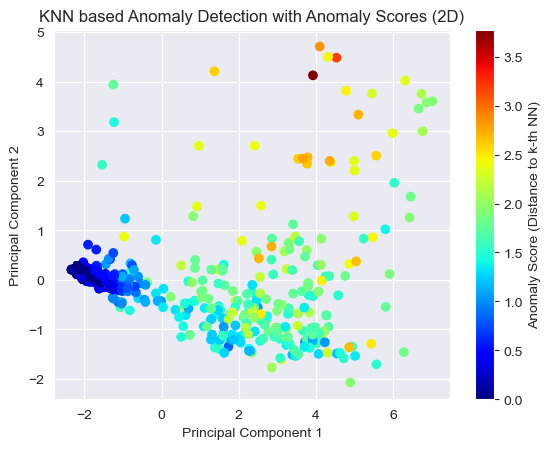

In [20]:
# visualize KNN-based anomaly detection in 2D
plt.scatter(Anom_pca[:, 0], Anom_pca[:, 1], c=anomaly_scores, cmap='jet')
plt.colorbar(label='Anomaly Score (Distance to k-th NN)')
plt.title('KNN based Anomaly Detection with Anomaly Scores (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

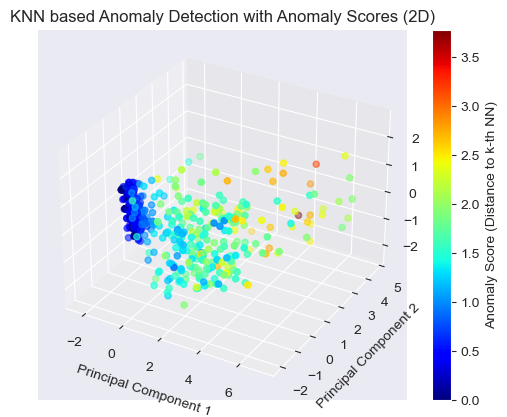

In [21]:
# visualize KNN-based anomaly detection in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(Anom_pca[:, 0], Anom_pca[:, 1], Anom_pca[:, 2], c=anomaly_scores, cmap='jet')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
fig.colorbar(scatter, label='Anomaly Score (Distance to k-th NN)')
plt.title('KNN based Anomaly Detection with Anomaly Scores (3D)')
plt.show()

In [22]:
# Combine anomaly score with the dataframe

anom = pd.DataFrame(anomaly_scores, index=df1.index, columns=['Anomaly score'])
result = pd.concat((df, anom), axis=1)
result.nlargest(5, 'Anomaly score')

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,class,Anomaly score
167,10,8,10,10,6,1.0,3,1,10,4,3.775173
71,6,10,2,8,10,2.0,7,8,10,4,3.183331
85,5,10,6,1,10,4.0,4,10,10,4,2.845920
268,10,8,8,2,3,4.0,8,7,8,4,2.786377
400,3,10,8,7,6,9.0,9,3,8,4,2.753236


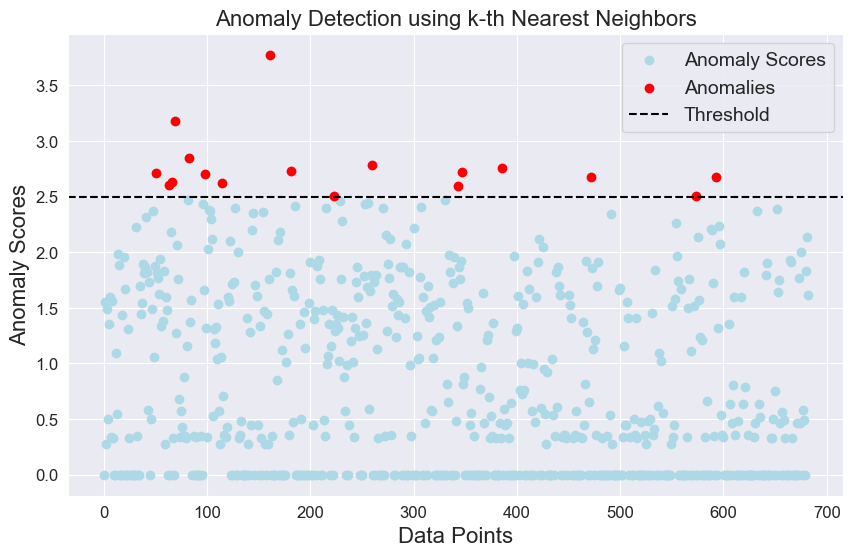

In [23]:
# Set the threshold
threshold = 2.5

# Create a scatter plot of anomaly scores
plt.figure(figsize=(10, 6))
plt.scatter(range(len(anomaly_scores)), anomaly_scores, color='lightblue', label='Anomaly Scores')

# Highlight points above the threshold in red
anomalies = np.where(anomaly_scores > threshold)[0]
plt.scatter(anomalies, anomaly_scores[anomalies], color='red', label='Anomalies')

# Draw a threshold line
plt.axhline(y=threshold, color='black', linestyle='--', label='Threshold')

plt.xlabel('Data Points',  fontsize=16)
plt.ylabel('Anomaly Scores',  fontsize=16)
plt.title('Anomaly Detection using k-th Nearest Neighbors',  fontsize=16)
plt.legend(fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [25]:
# calculates the sum of squared distances within clusters using Kmean
wcss=[]
for i in range(1,21):
    kmeans=KMeans(n_clusters=i,
                 init='k-means++',
                 random_state=0)
    kmeans.fit(Cancer)
    wcss.append(kmeans.inertia_)

C:\Users\adith\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\adith\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\adith\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\adith\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

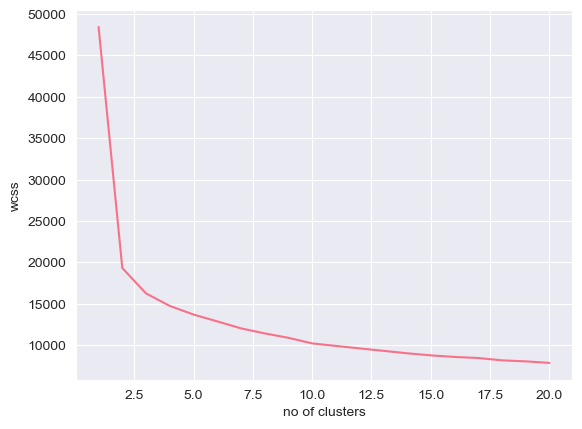

In [26]:
#plot elbow curve
plt.plot(range(1,21),wcss)
plt.xlabel("no of clusters")
plt.ylabel("wcss")
plt.show()

C:\Users\adith\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


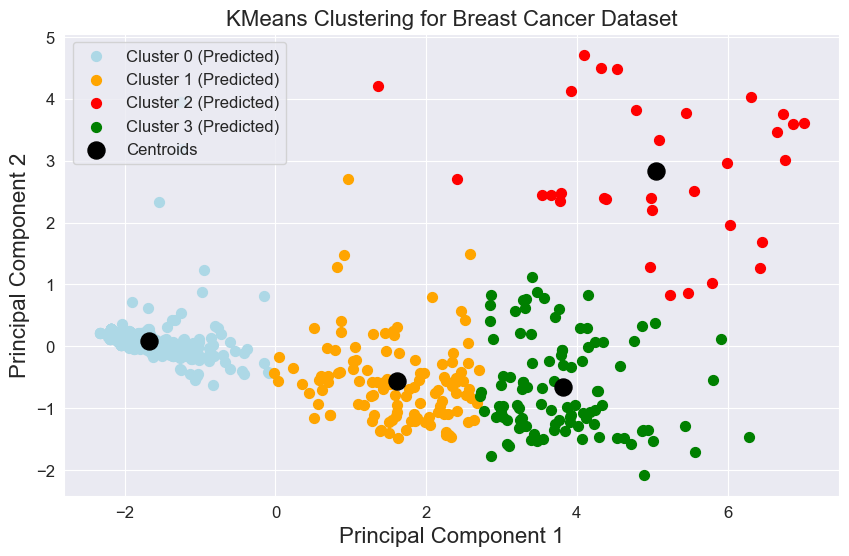

In [27]:
# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(Cancer)

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X_pca)

# Plot the results
plt.figure(figsize=(10, 6))
# Plot the predicted clusters
plt.scatter(X_pca[y_kmeans == 0, 0], X_pca[y_kmeans == 0, 1], s=50, c='lightblue', label='Cluster 0 (Predicted)')
plt.scatter(X_pca[y_kmeans == 1, 0], X_pca[y_kmeans == 1, 1], s=50, c='orange', label='Cluster 1 (Predicted)')
plt.scatter(X_pca[y_kmeans == 2, 0], X_pca[y_kmeans == 2, 1], s=50, c='red', label='Cluster 2 (Predicted)')
plt.scatter(X_pca[y_kmeans == 3, 0], X_pca[y_kmeans == 3, 1], s=50, c='green', label='Cluster 3 (Predicted)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=150, c='black', label='Centroids')

plt.title('KMeans Clustering for Breast Cancer Dataset', fontsize=16)
plt.xlabel('Principal Component 1',  fontsize=16)
plt.ylabel('Principal Component 2',  fontsize=16)
plt.legend(fontsize=12, loc='upper left')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [28]:
# Assuming you have already fitted the KMeans model and have y_kmeans
silhouette_avg = silhouette_score(X_pca, y_kmeans)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.6932560991980872
